
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [42]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Можна брати до уваги рід діяльності, якщо виснажлива робота, то може й на здоров'я більше витрат йти.
Вік, чим старше тим більше хвороб.
Звісно ж чи людина є курцем чи ні, додавати відносний відсоток до витрат в залежності від цього.
Регіон проживання, якщо є певне забруднення, то теж може збільшити витрати.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [43]:
%pip install plotly matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [44]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [45]:
fig = px.histogram(
    medical_df,
    x='charges',     
    color='region',     
    facet_col='sex', 
    nbins=50,         
    marginal='box',    
    title='Distribution of Charges by Sex and Region',
    hover_data=['charges'] 
)
fig.update_layout(bargap=0.1)
fig.show()

Можемо бачити, що на чоловіків по всім регіонам розкид витрат більший ніж на жінок, але медіана витрат для жінок на півночі більша.
Також дуже помітно, що серед жінок є більше тих, на кого йдуть малі витрати, ніж серед чоловіків. Цікавою є також певна тенденція у збільшені к-ті людей на яких витрати сягають більше 30 тисяч. 


**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [46]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'])
fig.update_layout(bargap=0.1)
fig.show()

У кожнму регіоні частка курців відносно однакова.

In [47]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],)
fig.update_layout(bargap=0.1)
fig.show()

У кодній категорії є як курці так і не курці, можна чітко баччити що курців набагто менше. Також можна помітити, що люди які мають 4 або 5 дітей рідше є курцями, але через це складно назвати тененціє, через малу к-сть даних у цих категоріях.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [48]:
px.violin(medical_df, y='charges', x='children', title='Distribution of Charges by Children and Smoker Status') 

Розкид витрат істотно не відрізняється залежно від кількості дітей. Трохи збільшується медіана витрат і мінімум відносно к-сті дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [49]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [50]:
import matplotlib.pyplot as plt

In [51]:
def estimate_charges(age, w, b):
    return w * age + b

In [52]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show() 

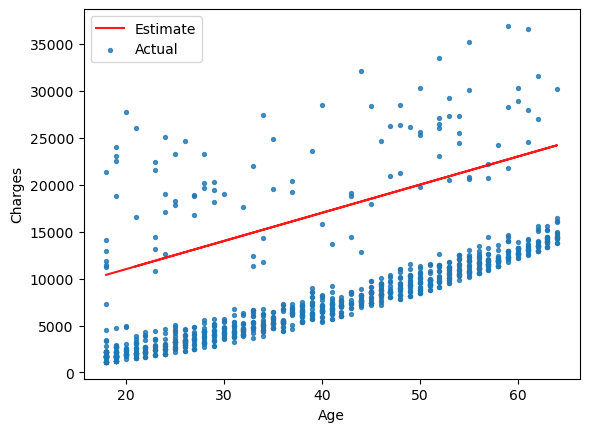

In [67]:
try_parameters(non_smoker_df, 300, 5000)

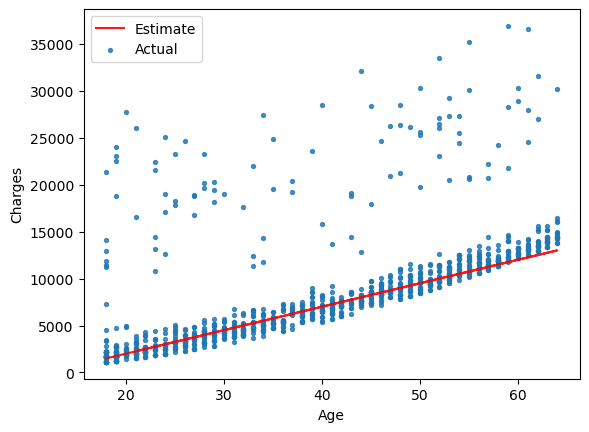

In [65]:
try_parameters(non_smoker_df, 250, -3000)

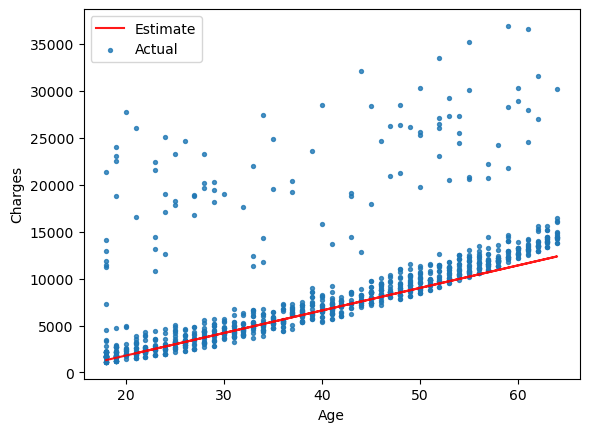

In [ ]:
try_parameters(non_smoker_df, 250, -2800)

w змінює нахил а b регулює лінію по висоті

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [56]:
import numpy as np

In [57]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [69]:
print("RMSE Loss  w = 300, b = 5000: ", rmse(non_smoker_df.charges, estimate_charges(non_smoker_df.age, 300, 5000)))

RMSE Loss  w = 300, b = 5000:  9601.992249808254


In [ ]:
print("RMSE Loss  w = 250, b = -2800: ", rmse(non_smoker_df.charges, estimate_charges(non_smoker_df.age, 250, -2800)))

RMSE Loss  w = 250, b = 2800:  4870.757269813526


In [ ]:
print("RMSE Loss  w = 250, b = -2800: ", rmse(non_smoker_df.charges, estimate_charges(non_smoker_df.age, 240, -2800)))

RMSE Loss  w = 250, b = 2800:  5006.081977797145


Можна покроково змінювати параметри і чим більше буде зменшуватися лосс тим менші зміни можна робити для параметрів.